In [1]:
!python --version

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Get plots with higher resolution
%config InlineBackend.figure_format = 'retina'

# Default styling for plots
sns.set(style="white", palette="muted", color_codes=True)

In [3]:
mall_data = pd.read_csv('../data/Mall_Customers.csv', 
                        index_col=['CustomerID'])
mall_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
extra_mall_data = pd.DataFrame(data={
    'CustomerID': [201, 202, 203, 204],
    'Gender': ['Trans', 'Trans', 'Trans', 'Trans'],
    'Age': [31, 19, 24, 55],
    'Annual Income (k$)': [21, 44, 31, 30],
    'Spending Score (1-100)': [0, 0, 0, 0]
})
extra_mall_data.set_index('CustomerID', inplace=True)
extra_mall_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
201,Trans,31,21,0
202,Trans,19,44,0
203,Trans,24,31,0
204,Trans,55,30,0


In [5]:
mall_data = pd.concat([mall_data, extra_mall_data], axis=0)
mall_data.tail(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
200,Male,30,137,83
201,Trans,31,21,0
202,Trans,19,44,0
203,Trans,24,31,0
204,Trans,55,30,0


In [6]:
mall_data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,204.000000,204.000000,204.000000
mean,38.720588,59.990196,49.215686
std,13.995966,26.341634,26.502766
min,18.000000,15.000000,0.000000
25%,28.000000,40.000000,31.750000
50%,36.000000,60.500000,49.500000
75%,49.000000,78.000000,72.250000
max,70.000000,137.000000,99.000000


In [7]:
mall_data.groupby('Gender').describe().T

Gender                            Female        Male      Trans
Age                    count  112.000000   88.000000   4.000000
                       mean    38.098214   39.806818  32.250000
                       std     12.644095   15.514812  15.945219
                       min     18.000000   18.000000  19.000000
                       25%     29.000000   27.750000  22.750000
                       50%     35.000000   37.000000  27.500000
                       75%     47.500000   50.500000  37.000000
                       max     68.000000   70.000000  55.000000
Annual Income (k$)     count  112.000000   88.000000   4.000000
                       mean    59.250000   62.227273  31.500000
                       std     26.011952   26.638373   9.469248
                       min     16.000000   15.000000  21.000000
                       25%     39.750000   45.500000  27.750000
                       50%     60.000000   62.500000  30.500000
                       75%     77.250000   78.000000  34.250000
                       max    126.000000  137.000000  44.000000
Spending Score (1-100) count  112.000000   88.000000   4.000000
                       mean    51.526786   48.511364   0.000000
                       std     24.114950   27.896770   0.000000
                       min      5.000000    1.000000   0.000000
                       25%     35.000000   24.500000   0.000000
                       50%     50.000000   50.000000   0.000000
                       75%     73.000000   70.000000   0.000000
                       max     99.000000   97.000000   0.000000

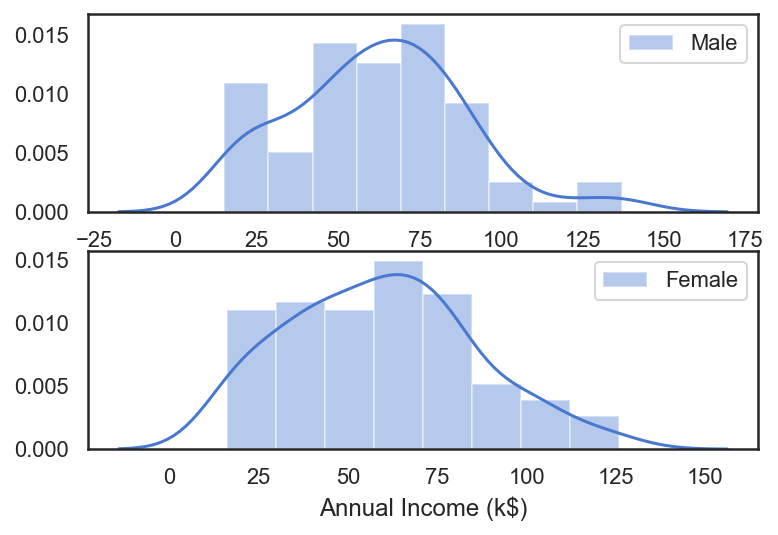

In [8]:
fig, axs = plt.subplots(2,1)

sns.distplot(mall_data.loc[mall_data['Gender']=='Male', 'Annual Income (k$)'], 
             ax=axs[0], label='Male')
axs[0].legend();
sns.distplot(mall_data.loc[mall_data['Gender']=='Female', 'Annual Income (k$)'], 
             ax=axs[1], label='Female')
axs[1].legend();


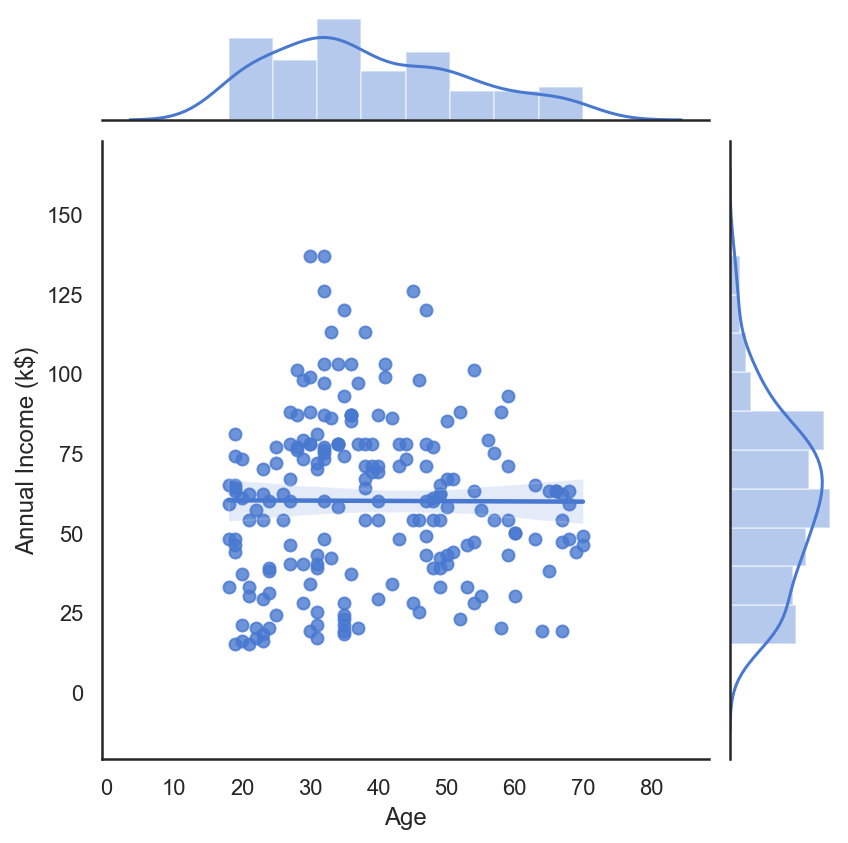

In [9]:
sns.jointplot(x='Age', y='Annual Income (k$)', 
              data=mall_data, kind='reg');

In [10]:
mall_data['Age'].corr(mall_data['Annual Income (k$)'])

-0.004483601848602221

> Komentarz:
> Praktycznie brak korelacji liniowej pomiędzy wiekiem, a rocznym przychodem. Powyższy wykres potwierdza ten fakt.

In [11]:
mall_data.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.004484,-0.294701
Annual Income (k$),-0.004484,1.000000,0.049799
Spending Score (1-100),-0.294701,0.049799,1.000000


## Confidence Intervals

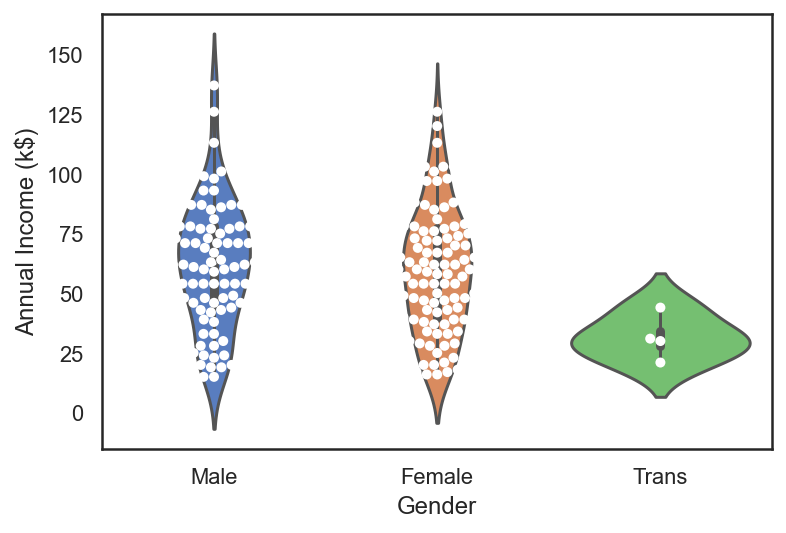

In [12]:
sns.violinplot(x='Gender', y='Annual Income (k$)', data=mall_data, )
sns.swarmplot(x='Gender', y='Annual Income (k$)', data=mall_data, color='w');

In [13]:
mall_data_stats = \
    mall_data.groupby('Gender')['Annual Income (k$)'] \
             .agg(['count', 'mean', 'std'])

ci95_low  = []
ci95_high = []

for i in mall_data_stats.index:
    count, mean, std = mall_data_stats.loc[i]
    z = 1.96  # number of standard deviations away from the average
              # where we can find 95% of observations
    ci95_low.append(mean - z * (std / math.sqrt(count)))
    ci95_high.append(mean + z * (std / math.sqrt(count)))

mall_data_stats['ci95_LOW'] = ci95_low
mall_data_stats['ci95_HIGH'] = ci95_high

mall_data_stats

,count,mean,std,ci95_LOW,ci95_HIGH
Gender,,,,,
Female,112,59.250000,26.011952,54.432519,64.067481
Male,88,62.227273,26.638373,56.661539,67.793007
Trans,4,31.500000,9.469248,22.220136,40.779864


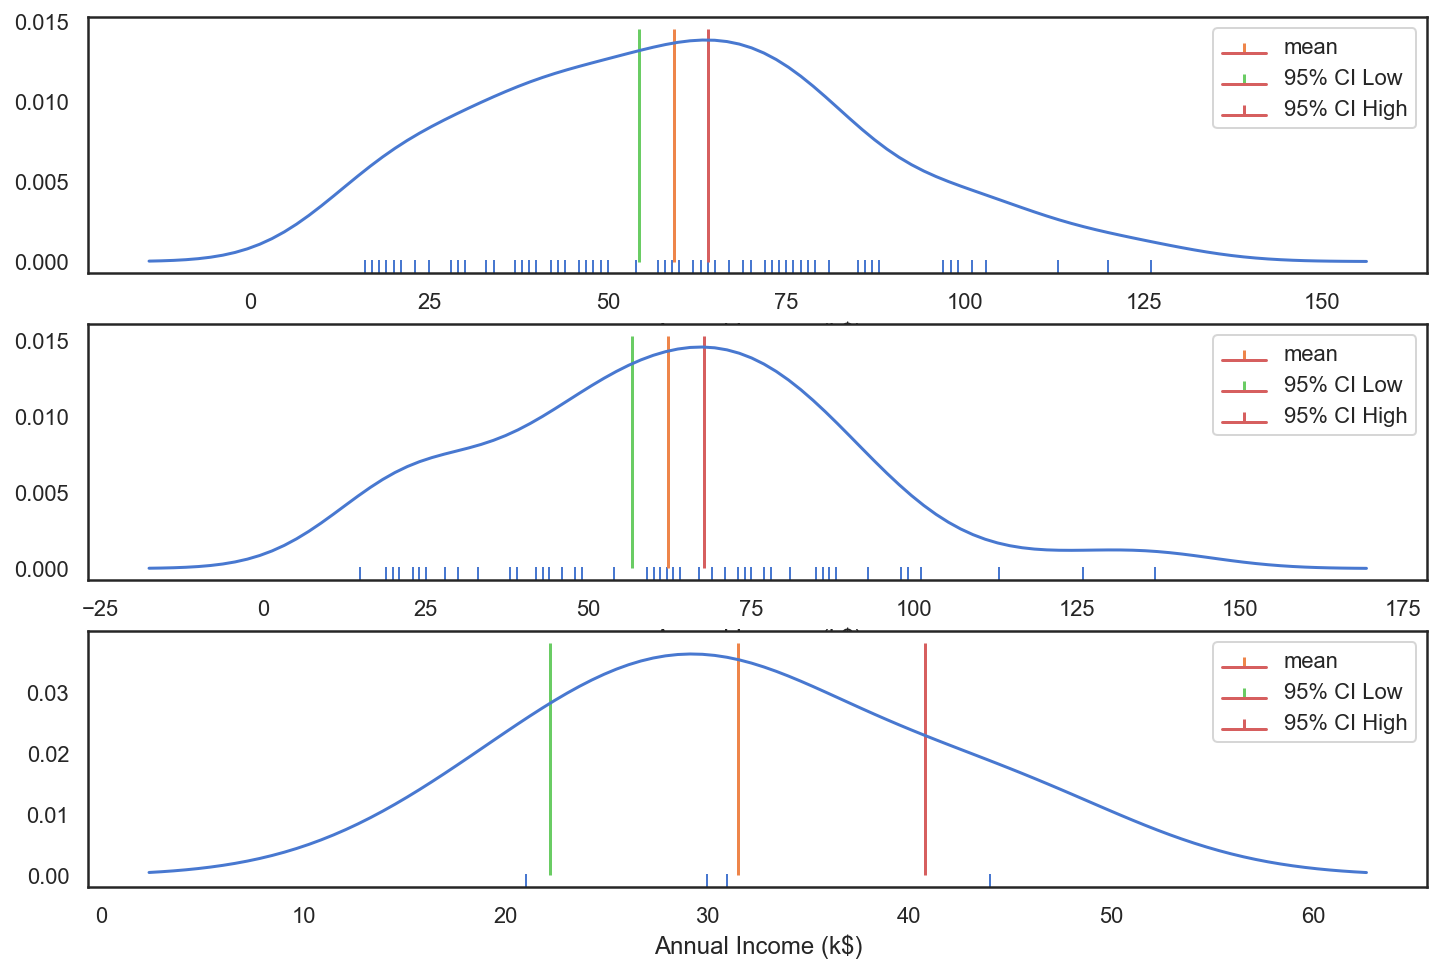

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(12,8))

for i, gender in enumerate(mall_data_stats.index):
    mask = mall_data['Gender']==gender
    data = mall_data.loc[mask, 'Annual Income (k$)']
    ax = sns.distplot(data, ax=axs[i], rug=True, kde=True, hist=False) 
    _, y_max = ax.get_ylim()
    
    axs[i].stem([mall_data_stats.loc[gender, 'mean']],
                [y_max], linefmt='C1', markerfmt='C1',
                label='mean', use_line_collection=True)
    axs[i].stem([mall_data_stats.loc[gender, 'ci95_LOW']],
                [y_max], linefmt='C2', markerfmt='C2',
                label='95% CI Low', use_line_collection=True)
    axs[i].stem([mall_data_stats.loc[gender, 'ci95_HIGH']],
                [y_max], linefmt='C3', markerfmt='C3',
                label='95% CI High', use_line_collection=True)  
    axs[i].legend();

## Z-score

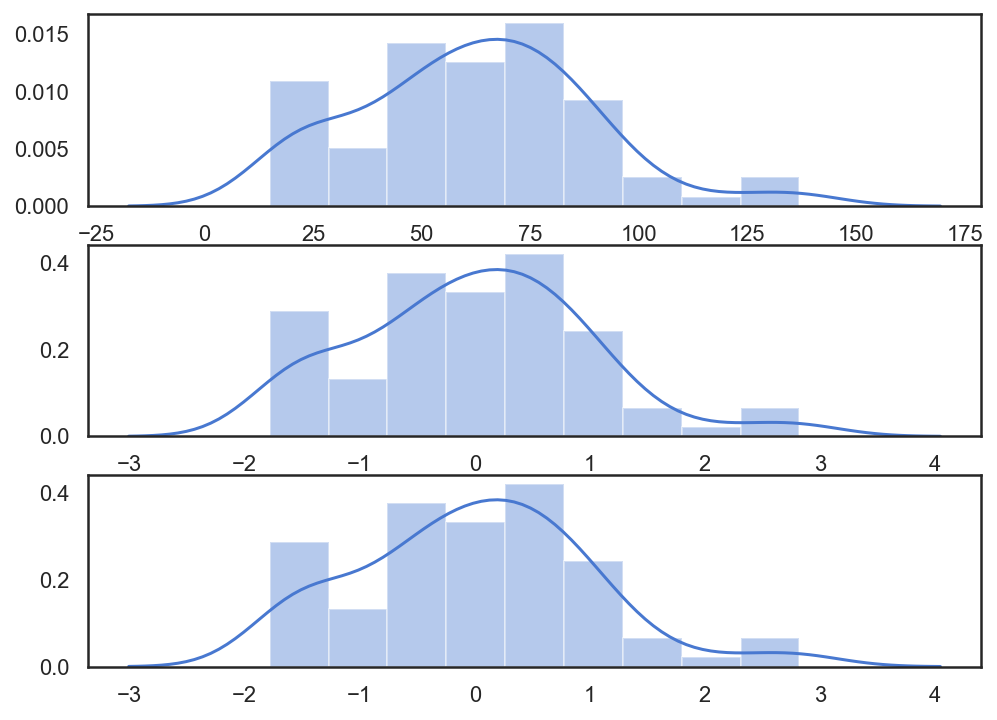

In [15]:
import scipy
from sklearn import preprocessing

male_income = mall_data.loc[mall_data['Gender']=='Male', 'Annual Income (k$)']

# data standardization
standardized_male_income = preprocessing.scale(male_income)
# z score
z_score_male_income = scipy.stats.zscore(male_income)

fig, axs = plt.subplots(3, 1, figsize=(8,6))
sns.distplot(male_income, kde=True, ax=axs[0])
sns.distplot(standardized_male_income, kde=True, ax=axs[1])
sns.distplot(z_score_male_income, kde=True, ax=axs[2]);